In [1]:
!pip install import-ipynb
import import_ipynb


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# import import_mpii
# activities_set = import_mpii.activities_set
#
# train_loader =  import_mpii.train_loader
# val_loader = import_mpii.val_loader
# test_loader = import_mpii.test_loader
# label_encoder = import_mpii.label_encoder
# num_classes = import_mpii.num_classes

I: 0. Filename ./content/pushups/images?q=tbn:ANd9GcQEPdgAxD-pT2WYA42SNVz-u-BJAlV1GCiFrg&s act Name: ['down']
I: 1. Filename ./content/pushups/images?q=tbn:ANd9GcTX-r6Ei_3KYDcb7TTe5qRF6yQx4508QzIRsg&s act Name: ['down']
I: 2. Filename ./content/pushups/images?q=tbn:ANd9GcR6xGhGvSOPx_bF4KDpPnHxyyR7NZ-1K8l4qw&s act Name: ['down']
I: 3. Filename ./content/pushups/images?q=tbn:ANd9GcTFOQJYUGQmzYHVeYTdPAtoDqz_TM6npQzDeA&s act Name: ['down']
I: 4. Filename ./content/pushups/images?q=tbn:ANd9GcQEgdrLOn_W_5-U9Epr4vO9hqFlq4Vev5u5zw&s act Name: ['down']
I: 5. Filename ./content/pushups/images?q=tbn:ANd9GcTBUM-F2q6fg64a09jOJtq__ZlC84iIcr_LEw&s act Name: ['down']
I: 6. Filename ./content/pushups/images?q=tbn:ANd9GcS0ZhEL4QEhahDsOw5afvAlttpPqV8F1U81Rw&s act Name: ['down']
I: 7. Filename ./content/pushups/images?q=tbn:ANd9GcT2alZKH9UFQ6_H7HeepLPPAt6XWeGjlJexng&s act Name: ['down']
I: 8. Filename ./content/pushups/images?q=tbn:ANd9GcTWmEWo9vEmrBaOsmoFAr4z5fe4OKjR5DeRrw&s act Name: ['down']
I: 9. File

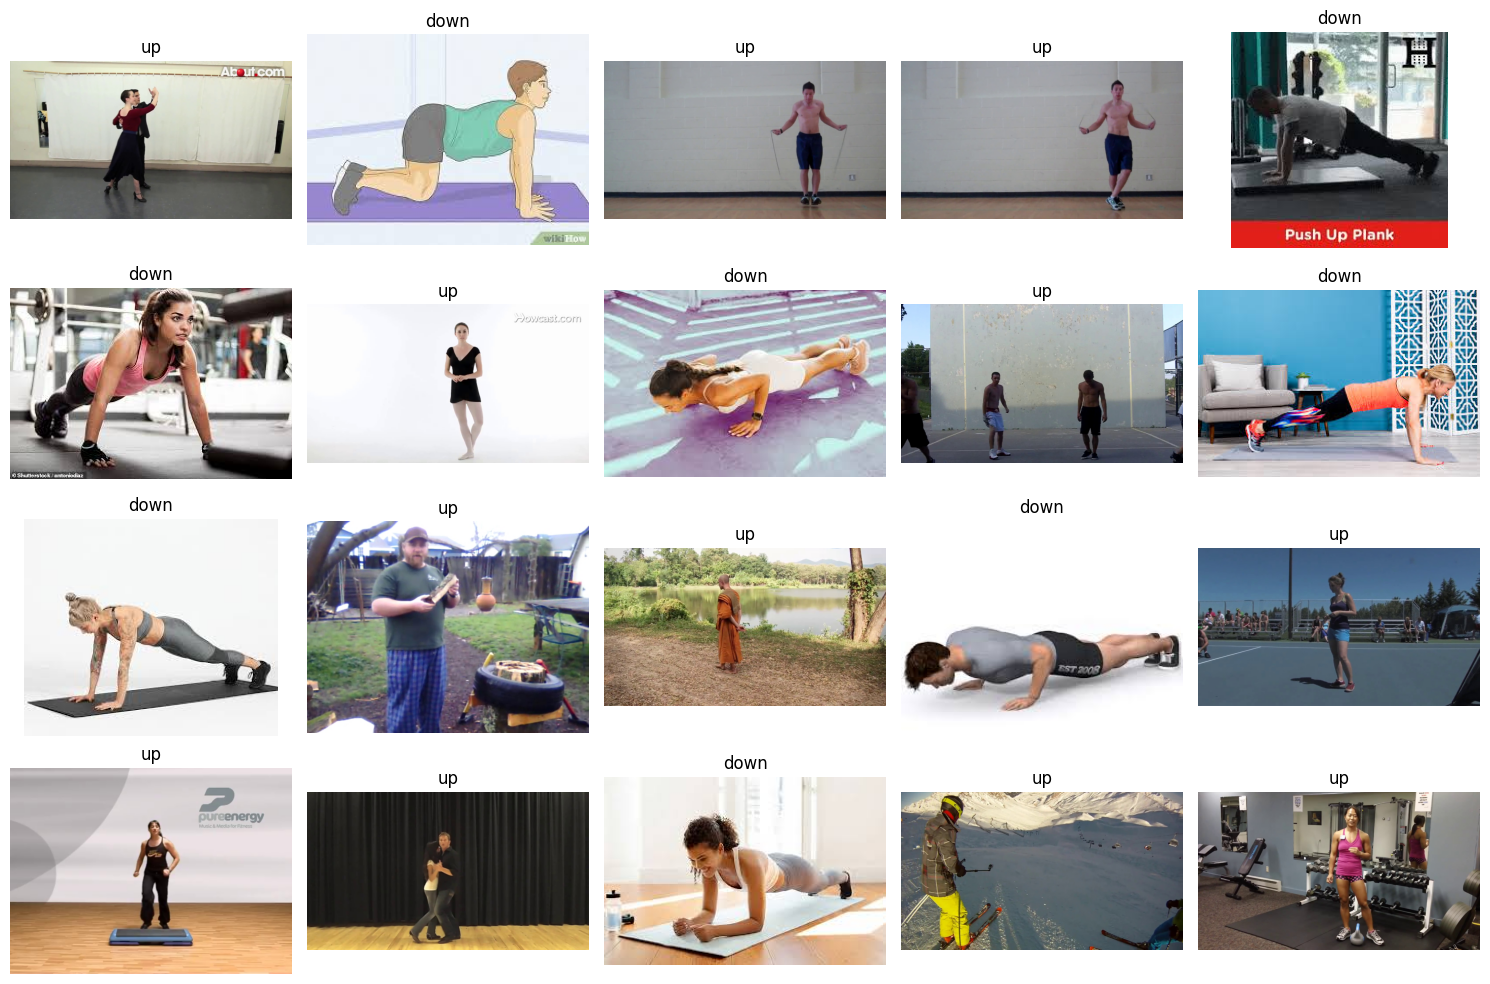

Category: down, Count: 674
Category: up, Count: 516


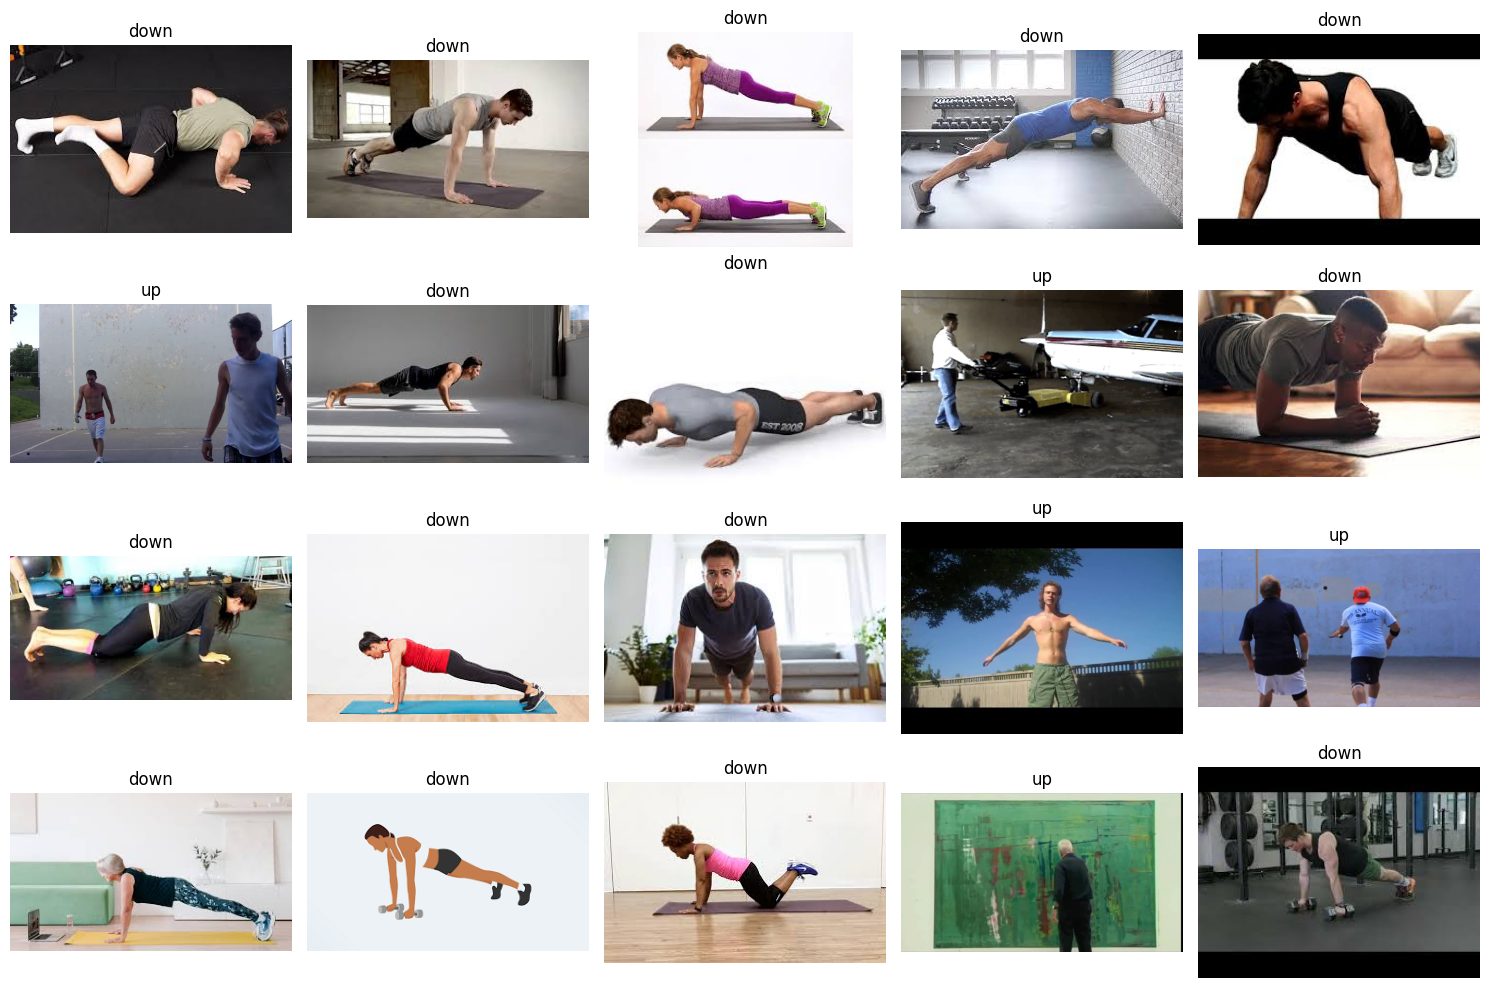

Filtered dataset size: 1190
[('./content/pushups/images?q=tbn:ANd9GcSntmDUD4x9-T6xBUFuvyJxCHrJHeeyO0-zfQ&s', ['down']), ('./content/standing/003820278.jpg', ['up']), ('./content/standing/012915942.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcTFK4VBrh0tYaJ3hT_trfDy7ojtCOdZWtYmCw&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcQibytZun6zm_8bBfDq1jEYLnmxocEk57jLJQ&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcSRV735JJzNIJD2YEpCAVsIeDkOGe2ctShKbQ&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcRtUhM_oBukoiV4YdmAcfswxnOqUe7lUWQRTg&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcQODR3GxpiMBC9uKAeir7FMi-Ql36mgzFVztg&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcTlVhTe1VNtHsqtrvJb5zVvXRbBqaDt6Obt9A&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcRlpj1pz24zLSWBEnana21bxCzXEPrdSgNjtg&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcTTXR0mCEkhkvC1ajMMrOjg7Au9vP7Uf5UZoA&s', ['down']), ('./content/standing/006443763.jpg', ['up']), ('./content/pu

In [3]:
import import_selected
activities_set = import_selected.activities_set

train_loader =  import_selected.train_loader
val_loader = import_selected.val_loader
test_loader = import_selected.test_loader
label_encoder = import_selected.label_encoder
num_classes = import_selected.num_classes

In [4]:
# import import_coco
#
# train_loader =  import_coco.train_loader
# val_loader = import_coco.val_loader
# test_loader = None

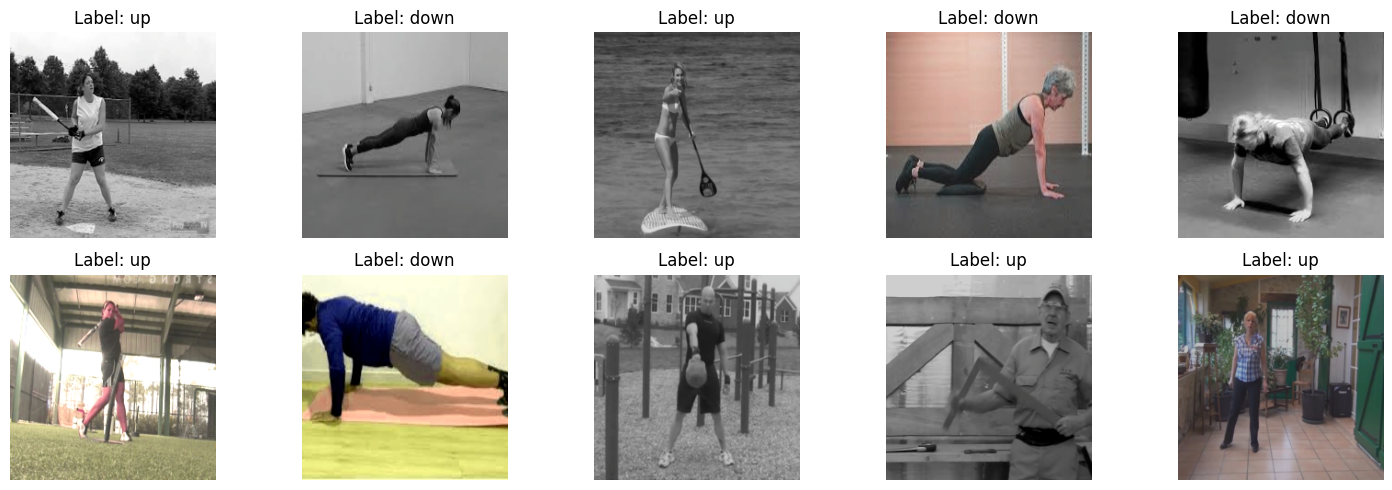

In [5]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Function to visualize 10 images with labels
def visualize_images_with_labels(train_loader, label_encoder):
    # Get a batch of data
    data_iter = iter(train_loader)
    images, labels = next(data_iter)

    # Reverse normalization for visualization
    inv_normalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    images = [inv_normalize(img).permute(1, 2, 0).numpy() for img in images[:10]]

    # Plot 10 images with labels
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {label_encoder.inverse_transform([labels[i].item()])[0]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
visualize_images_with_labels(train_loader, import_selected.label_encoder)

In [6]:
import torch
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

Using device: cuda


In [7]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import copy


def train_model(train_loader, val_loader, test_loader, model, epochs=5, save_file_name="best.pt"):
    # Initialize the model, loss function, and optimizer
    model.to(DEVICE)
    criterion = nn.CrossEntropyLoss()

    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay = 0.0001)
    #optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    best_val_acc = 0
    best_model_copy = None

    # Training loop
    for epoch in range(epochs):
        model.train()
        print("training... 💪")
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            train_correct += (predicted == labels).sum().item()
            train_total += labels.size(0)

            if batch_idx % 10 == 0:
                print(f'Epoch [{epoch + 1}/{epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        train_accuracy = 100 * train_correct / train_total
        train_accuracies.append(train_accuracy)

        # Validation loop
        model.eval()
        print("evaluating... !!!")
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(DEVICE), target.to(DEVICE)
                outputs = model(data)
                loss = criterion(outputs, target)
                val_loss += loss.item()

                predicted = torch.argmax(outputs, dim=1)
                total += target.size(0)
                correct += (predicted == target).sum().item()

        train_losses.append(val_loss)

        val_loss /= len(val_loader)
        val_accuracy = 100 * correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_weights = model.state_dict()
            torch.save(best_weights, save_file_name)
            print(f"Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾")
            #save the best model copy into the best_model_copy variable
            best_model_copy = copy.deepcopy(model)


        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {running_loss / len(train_loader):.4f}, "
              f"Train Accuracy: {train_accuracy:.4f}%, Validation Loss: {val_loss:.4f}, "
              f"Validation Accuracy: {val_accuracy:.4f}%  Best so far: {best_val_acc:.4f}%")

    # Test evaluation
    print("\nEvaluating on test dataset...")
    best_model_copy.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            outputs = best_model_copy(data)
            loss = criterion(outputs, target)
            test_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = 100 * correct / total
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # Plot the loss and accuracy curves
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses[1:], label='Training Loss')
    plt.plot(val_losses[1:], label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()

    return best_val_acc, model

training... 💪
Epoch [1/50], Batch [1/30], Loss: 1.0860
Epoch [1/50], Batch [11/30], Loss: 0.6358
Epoch [1/50], Batch [21/30], Loss: 0.6073
evaluating... !!!
Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾
Epoch 1/50, Train Loss: 0.8805, Train Accuracy: 61.3445%, Validation Loss: 0.6621, Validation Accuracy: 68.0672%  Best so far: 68.0672%
training... 💪
Epoch [2/50], Batch [1/30], Loss: 0.5728
Epoch [2/50], Batch [11/30], Loss: 0.6205
Epoch [2/50], Batch [21/30], Loss: 0.6537
evaluating... !!!
Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾
Epoch 2/50, Train Loss: 0.6118, Train Accuracy: 66.4916%, Validation Loss: 0.5824, Validation Accuracy: 70.5882%  Best so far: 70.5882%
training... 💪
Epoch [3/50], Batch [1/30], Loss: 0.4913
Epoch [3/50], Batch [11/30], Loss: 0.6906
Epoch [3/50], Batch [21/30], Loss: 0.5657
evaluating... !!!
Epoch 3/50, Train Loss: 0.5873, Train Accuracy: 67.2269%, Validation Loss: 1.0826, Validation Accuracy: 65.5462%  Best so far: 70.5882%
training... 💪
Epoch [4/50], Batch [1/30

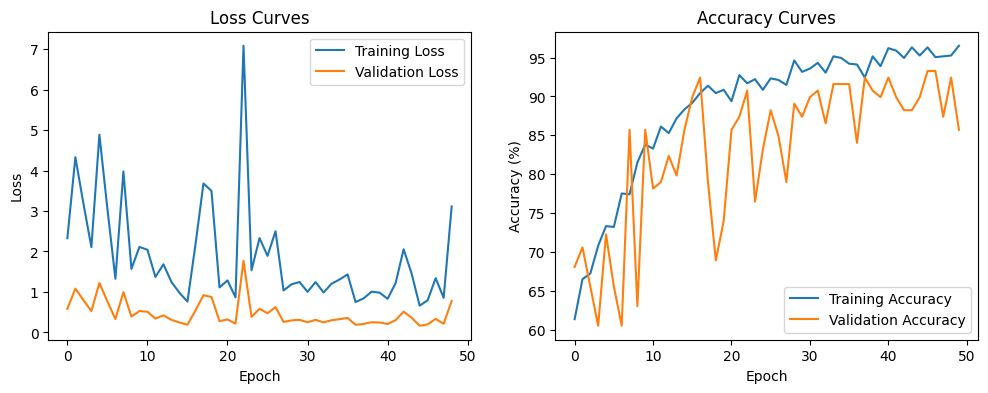

In [8]:
import torch
from models import BiTLikeModel
torch.cuda.empty_cache()
best_val_acc, model = train_model(train_loader, val_loader, test_loader, model=BiTLikeModel(2), epochs=50, save_file_name="BiTLikeModel.pt")

In [11]:
from inferring import test_image, load_model
from models import BiTLikeModel

#testuojam
load_model("BiTLikeModel.pt", BiTLikeModel)

# atsispaudzia
image_path = 'test_data/ats1.jpeg'
test_image(image_path)
image_path = 'test_data/ats2.jpeg'
test_image(image_path)

print("=======================")

# stovi
image_path = 'test_data/stov1.jpg'
test_image(image_path)
image_path = 'test_data/stov2.jpg'
test_image(image_path)

Using device-------------------: cuda
Model loaded successfully!
Using device: cuda
output: tensor([[ 6.0178, -5.6287]], device='cuda:0')
probabilities: tensor([[9.9999e-01, 8.7499e-06]], device='cuda:0')
Predicted class index: 0, Probability: 1.0000
Using device: cuda
output: tensor([[ 4.1169, -3.8405]], device='cuda:0')
probabilities: tensor([[9.9965e-01, 3.4995e-04]], device='cuda:0')
Predicted class index: 0, Probability: 0.9997
Using device: cuda
output: tensor([[-3.3299,  3.5269]], device='cuda:0')
probabilities: tensor([[0.0011, 0.9989]], device='cuda:0')
Predicted class index: 1, Probability: 0.9989
Using device: cuda
output: tensor([[-3.8155,  4.0730]], device='cuda:0')
probabilities: tensor([[3.7488e-04, 9.9963e-01]], device='cuda:0')
Predicted class index: 1, Probability: 0.9996


(1, 0.9996250867843628)

/home/a/development/burpies/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


training... 💪
Epoch [1/57], Batch [1/30], Loss: 10.0462
Epoch [1/57], Batch [11/30], Loss: 1.2081
Epoch [1/57], Batch [21/30], Loss: 0.5747
evaluating... !!!
Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾
Epoch 1/57, Train Loss: 0.9854, Train Accuracy: 82.8782%, Validation Loss: 3.9351, Validation Accuracy: 83.1933%  Best so far: 83.1933%
training... 💪
Epoch [2/57], Batch [1/30], Loss: 0.3113
Epoch [2/57], Batch [11/30], Loss: 0.1694
Epoch [2/57], Batch [21/30], Loss: 0.0282
evaluating... !!!
Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾
Epoch 2/57, Train Loss: 0.1757, Train Accuracy: 93.5924%, Validation Loss: 0.1626, Validation Accuracy: 94.9580%  Best so far: 94.9580%
training... 💪
Epoch [3/57], Batch [1/30], Loss: 0.0174
Epoch [3/57], Batch [11/30], Loss: 0.1018
Epoch [3/57], Batch [21/30], Loss: 0.0695
evaluating... !!!
Epoch 3/57, Train Loss: 0.0724, Train Accuracy: 97.2689%, Validation Loss: 0.1979, Validation Accuracy: 91.5966%  Best so far: 94.9580%
training... 💪
Epoch [4/57], Batch [1/3

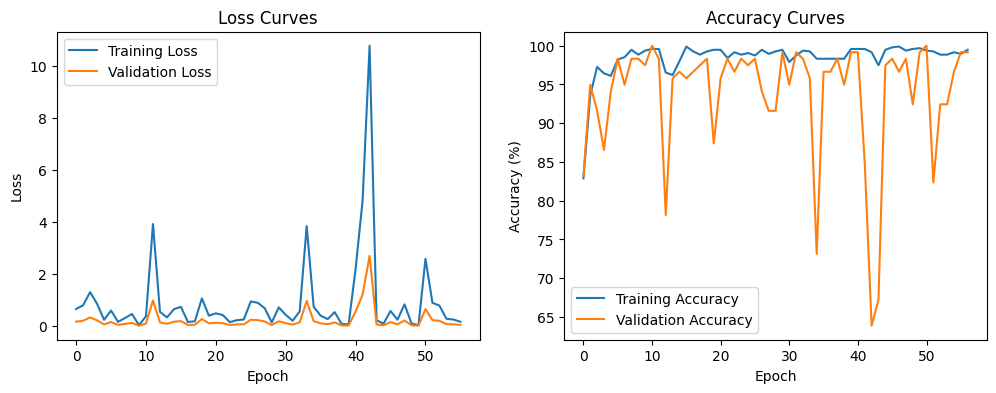

In [12]:
import torchvision.models as models

# Load a pre-trained ResNet-50 model. defaults to weights=ResNet50_Weights.IMAGENET1K_V1
resnet50 = models.resnet50(weights=True)

import torch
torch.cuda.empty_cache()
best_val_acc, model = train_model(train_loader, val_loader, test_loader, model=resnet50, epochs=57, save_file_name="resnet50.pt")

training... 💪
Epoch [1/50], Batch [1/30], Loss: 0.6877
Epoch [1/50], Batch [11/30], Loss: 0.6148
Epoch [1/50], Batch [21/30], Loss: 0.5831
evaluating... !!!
Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾
Epoch 1/50, Train Loss: 0.9720, Train Accuracy: 59.3487%, Validation Loss: 0.5710, Validation Accuracy: 71.4286%  Best so far: 71.4286%
training... 💪
Epoch [2/50], Batch [1/30], Loss: 0.5898
Epoch [2/50], Batch [11/30], Loss: 0.5084
Epoch [2/50], Batch [21/30], Loss: 0.4626
evaluating... !!!
Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾
Epoch 2/50, Train Loss: 0.5557, Train Accuracy: 72.5840%, Validation Loss: 0.5251, Validation Accuracy: 74.7899%  Best so far: 74.7899%
training... 💪
Epoch [3/50], Batch [1/30], Loss: 0.6107
Epoch [3/50], Batch [11/30], Loss: 0.4019
Epoch [3/50], Batch [21/30], Loss: 0.5930
evaluating... !!!
Epoch 3/50, Train Loss: 0.5010, Train Accuracy: 75.2101%, Validation Loss: 0.5684, Validation Accuracy: 73.9496%  Best so far: 74.7899%
training... 💪
Epoch [4/50], Batch [1/30

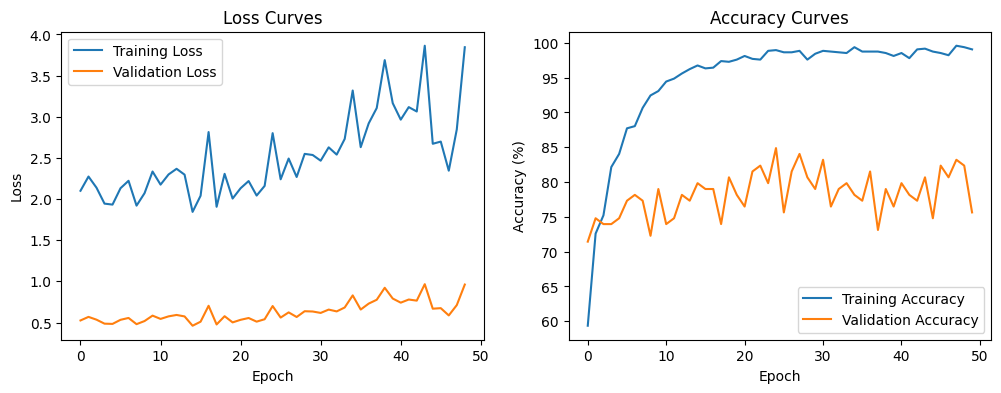

In [13]:
from models import SimpleConvNet

import torch
torch.cuda.empty_cache()
best_val_acc, model = train_model(train_loader, val_loader, test_loader, model=SimpleConvNet(2), epochs=50, save_file_name="SimpleConvNet.pt")